# Restaurant Chains EDA, Data Mining, and Model Performance

## David Berberena

## 4/21/2024

### Investing in the restaurant industry here in the United States can be very lucrative for the American investor. With the abundance of restaurant chains offering a variety of options to consumers, there is sure to be a return on investment hidden within the number of establishments serving countless amounts of sustenance. However, if an asset management company specializing in the management of customer funds allocated towards stocks, mutual funds, options, ETFs, and other marketable securities in the foodservice industry markets themselves as being able to provide a stable and/or high rate of return, the company must know how best to manage their customers' assets to provide the most convenient type of ROI possible for the client. For this to be realized, the company must understand where the restaurant industry's money is made so they can invest their customers' funds to make money for both their clients and the company itself. This is where restaurant chains come into play, as these giants dominate the revenue generated by the foodservice industry. The issue of confidently identifying lucrative restaurant chains to invest in, whether individually or through mutual funds and ETFs that encompass many of these top restaurant chains as part of a restaurant sector, can be solved by exploring data related to these chains, their revenue, and their sector designation to understand the rate of growth. If asset management companies geared towards foodservice industry asset investment can successfully understand and analyze related data to make an informed decision for their clients, the company itself will ultimately increase its bottom line and retain clients who will continue to realize the ROI that they are interested in. 

### I have retrieved data from Kaggle outlining information concerning the top one hundred restaurant chains in the United States in 2021 based on 2020 performance. Using the data, I will be analyzing what sector of the restaurant chain subcategory of the foodservice industry an asset management company should invest their client's money into to realize a strong ROI. To help address the solution to this topic, a few questions can be asked of the data. What restaurant chain sector generates the most revenue? Which sector has the highest positive change in sales? What about the highest positive change in units? How about inquiring even about the relationship between menu category and total sales? Let's dive into the data to see what we can find.

In [1]:
# Pandas, NumPy, and Matplotlib are the libraries needed to be imported to properly read, manipulate, and graph the data. 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Using read_csv() and head(), the data will be stored and displayed.

restaurant_data = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20550%20Data%20Mining/top100chains.csv'

restaurant_chains = pd.read_csv(restaurant_data)

restaurant_chains.head()

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,"$40,517",0.30%,"13,682",-1.20%,Quick Service,Burger
1,2,Starbucks,"$18,485",-13.50%,"15,337",1.90%,Quick Service,Coffee Café
2,3,Chick-fil-A,"$13,745",13.00%,"2,659",6.70%,Quick Service,Chicken
3,4,Taco Bell,"$11,294",0.00%,"6,799",0.50%,Quick Service,Mexican
4,5,Wendy's,"$10,231",4.80%,"5,881",0.50%,Quick Service,Burger


### I will begin by generating a graph that will display total revenue by restaurant segment.

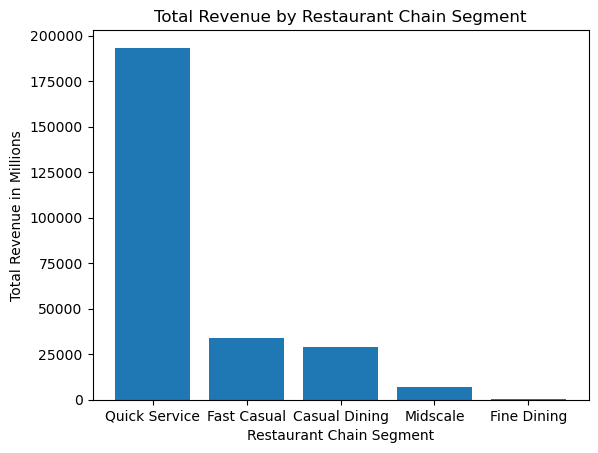

In [2]:
# To manipulate the data to provide the total revenue for each restaurant segment, I will store the revenue of each chain 
# in its respective segment through the creation of a dictionary. Then I will create and display the graph needed to 
# visualize the results. 

# Prior to crafting the graph, I need to clean the data a little first. The two variables I need to work with here have 
# extra special characters and punctuation that needs to be removed. The replace() function is used to remove them. 

restaurant_chains['2020 U.S. Sales ($000,000)'] = [segment.replace('\t', '') for segment in 
                                                   restaurant_chains['2020 U.S. Sales ($000,000)']]
restaurant_chains['2020 U.S. Sales ($000,000)'] = [segment.replace('$', '') for segment in 
                                                   restaurant_chains['2020 U.S. Sales ($000,000)']]
restaurant_chains['2020 U.S. Sales ($000,000)'] = [segment.replace(',', '') for segment in 
                                                   restaurant_chains['2020 U.S. Sales ($000,000)']]
restaurant_chains['SEGMENT'] = [segment.replace('\t', '') for segment in restaurant_chains['SEGMENT']]

# The dictionary is created here.

revenue_by_segment = {}

# I am using a for loop to fill the empty dictionary with the values needed to calculate the revenue to chain segment. The 
# zip() function is helpful here to capture multiple variables to craft the dictionary.

for chain, sales, segment in zip(restaurant_chains['CHAIN'], restaurant_chains['2020 U.S. Sales ($000,000)'], 
                                 restaurant_chains['SEGMENT']):
    sales = float(sales)
    if segment not in revenue_by_segment:
        revenue_by_segment[segment] = sales
    else:
        revenue_by_segment[segment] += sales
        
# The dictionary keys and values are then turned into lists so that the graph can be properly displayed with the sum of 
# revenue for each chain segment.
        
segments = list(revenue_by_segment.keys())
segment_revenues = list(revenue_by_segment.values())
        
# Now I can display the dictionary results as a bar graph using Matplotlib.

plt.bar(segments, segment_revenues)
plt.xlabel('Restaurant Chain Segment')
plt.ylabel('Total Revenue in Millions')
plt.title('Total Revenue by Restaurant Chain Segment')
plt.show()

### Looking at the results of this bar chart, it is abundantly clear that the quick service sector of the top 100 restaurant chains generates the most revenue in comparison to the other sectors.

### The next graph I will be displaying is the highest positive change in sales by restaurant segment.

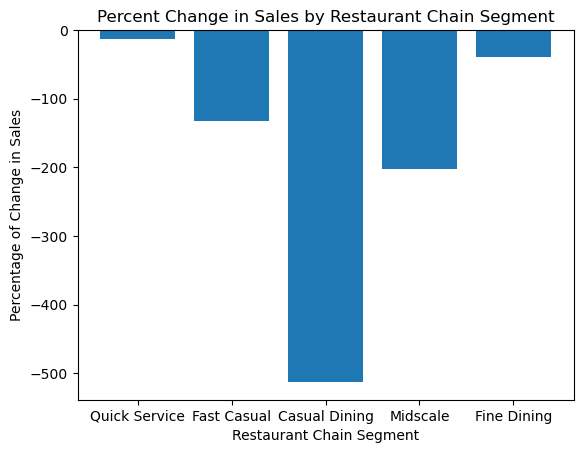

In [3]:
# Again, prior to crafting the graph, the variables must be cleaned by way of removing special characters.

restaurant_chains['YOY SALES CHANGE'] = [segment.replace('%', '') for segment in restaurant_chains['YOY SALES CHANGE']]

# I am employing the same for loop tactic as the first graph to output the next one.

sales_change_by_segment = {}

for chain, change, segment in zip(restaurant_chains['CHAIN'], restaurant_chains['YOY SALES CHANGE'], 
                                 restaurant_chains['SEGMENT']):
    change = float(change)
    if segment not in sales_change_by_segment:
        sales_change_by_segment[segment] = change
    else:
        sales_change_by_segment[segment] += change

segments = list(sales_change_by_segment.keys())
sales_change = list(sales_change_by_segment.values())

plt.bar(segments, sales_change)
plt.xlabel('Restaurant Chain Segment')
plt.ylabel('Percentage of Change in Sales')
plt.title('Percent Change in Sales by Restaurant Chain Segment')
plt.show()

### The bar chart here shows that every restaurant chain sector displays a negative aggregate percent change in sales, with the quick service sector providing the least negative change.

### The third graph to be shown is the highest positive change in units by restaurant segment.

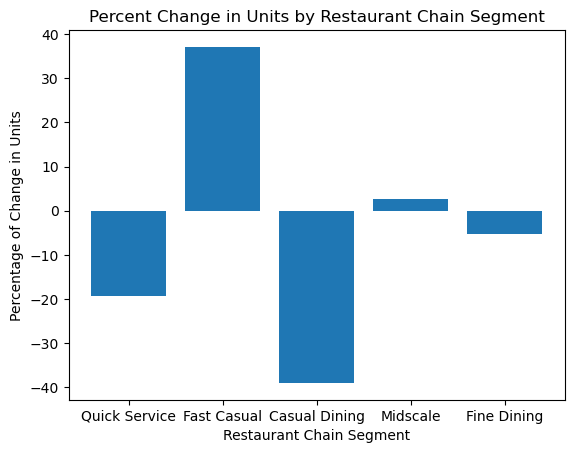

In [4]:
# Cleaning of the new featured variable must occur before any graph creation.

restaurant_chains['YOY UNIT CHANGE'] = [segment.replace('%', '') for segment in restaurant_chains['YOY UNIT CHANGE']]

# The graph creation can now commence.

unit_change_by_segment = {}

for chain, unit_change, segment in zip(restaurant_chains['CHAIN'], restaurant_chains['YOY UNIT CHANGE'], 
                                 restaurant_chains['SEGMENT']):
    unit_change = float(unit_change)
    if segment not in unit_change_by_segment:
        unit_change_by_segment[segment] = unit_change
    else:
        unit_change_by_segment[segment] += unit_change

segments = list(unit_change_by_segment.keys())
unit_change_percent = list(unit_change_by_segment.values())

plt.bar(segments, unit_change_percent)
plt.xlabel('Restaurant Chain Segment')
plt.ylabel('Percentage of Change in Units')
plt.title('Percent Change in Units by Restaurant Chain Segment')
plt.show()

### This graph indicates the highest positive percent change in units belongs to the fast casual restaurant chain sector. 

### The final graph that I would like to highlight is total revenue by menu category.

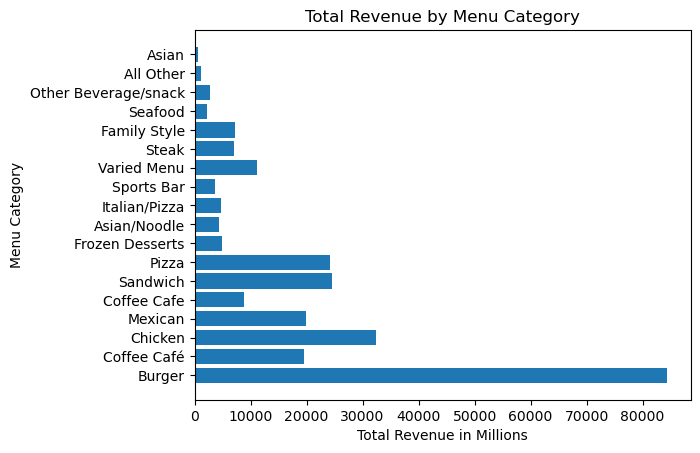

In [5]:
# Clean the new variable.

restaurant_chains['MENU CATEGORY'] = [segment.replace('\t', '') for segment in restaurant_chains['MENU CATEGORY']]

revenue_by_category = {}

for chain, sales, category in zip(restaurant_chains['CHAIN'], restaurant_chains['2020 U.S. Sales ($000,000)'], 
                                 restaurant_chains['MENU CATEGORY']):
    sales = float(sales)
    if category not in revenue_by_category:
        revenue_by_category[category] = sales
    else:
        revenue_by_category[category] += sales
        
categories = list(revenue_by_category.keys())
category_revenues = list(revenue_by_category.values())
        
# With this graph, I will be using a horizontal bar graph.

plt.barh(categories, category_revenues)
plt.ylabel('Menu Category')
plt.xlabel('Total Revenue in Millions')
plt.title('Total Revenue by Menu Category')
plt.show()

### With the output of the horizontal bar chart, the menu category that brings in the most revenue is the Burger category.

### After reviewing the above visual aids and considering the initial business problem at hand, there are many conclusions that can be drawn from the data. If the asset management company is working with a client who wishes to achieve maximum short-term ROI, the clear answer for the company would be to invest the client's funds into securities dealing with quick service burger restaurant chains. These chains have the highest revenue, least negative percent change in sales, and is the median sector in terms of percent change in units. If the company is dealing with a client who is looking more stable long-terms investments, then that client's assets would be best placed into those securities focusing on fast casual burger chains. These chains have the highest percent change in units, the second highest sector in revenue, and the median sector when looking at change in sales. Each client's needs and wants are different, and to stay relevant and prosper in the data-oriented world we live in today, companies need to be able to analyze the data to find an answer for each customer they do business with for maximum retention and long-term financial growth and stability. 

### Now that the above transformations to the dataset have been made, the dataset needs to be reprinted to see what other transformations need to be made to craft a human-readable and clean dataset.

In [6]:
restaurant_chains.head()

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,40517,0.30,"13,682",-1.20,Quick Service,Burger
1,2,Starbucks,18485,-13.50,"15,337",1.90,Quick Service,Coffee Café
2,3,Chick-fil-A,13745,13.00,"2,659",6.70,Quick Service,Chicken
3,4,Taco Bell,11294,0.00,"6,799",0.50,Quick Service,Mexican
4,5,Wendy's,10231,4.80,"5,881",0.50,Quick Service,Burger


### We can see that the '2020 U.S. UNITS' variable contains a non-numerical character, making the observations string values instead of the desired float values. This will be rectified here.

In [7]:
restaurant_chains['2020 U.S. UNITS'] = [segment.replace(',', '') for segment in 
                                                   restaurant_chains['2020 U.S. UNITS']]

restaurant_chains.head()

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,40517,0.30,13682,-1.20,Quick Service,Burger
1,2,Starbucks,18485,-13.50,15337,1.90,Quick Service,Coffee Café
2,3,Chick-fil-A,13745,13.00,2659,6.70,Quick Service,Chicken
3,4,Taco Bell,11294,0.00,6799,0.50,Quick Service,Mexican
4,5,Wendy's,10231,4.80,5881,0.50,Quick Service,Burger


### Now that the dataset looks human-readable and clean, the types of each column must be verified as correct for further data manipulation. This means that numerical columns should have either an integer or float type as their dtypes, and string columns should have an object dtype.

In [8]:
print(restaurant_chains.dtypes)

RANK                           int64
CHAIN                         object
2020 U.S. Sales ($000,000)    object
YOY SALES CHANGE              object
2020 U.S. UNITS               object
YOY UNIT CHANGE               object
SEGMENT                       object
MENU CATEGORY                 object
dtype: object


### The dataset presents with incorrect dtypes for many columns, so I will change the types accordingly here and verify the types that are correct.

In [9]:
restaurant_chains['CHAIN'] = restaurant_chains['CHAIN'].astype(str)
restaurant_chains['2020 U.S. Sales ($000,000)'] = restaurant_chains['2020 U.S. Sales ($000,000)'].astype(int)
restaurant_chains['YOY SALES CHANGE'] = restaurant_chains['YOY SALES CHANGE'].astype(float)
restaurant_chains['2020 U.S. UNITS'] = restaurant_chains['2020 U.S. UNITS'].astype(int)
restaurant_chains['YOY UNIT CHANGE'] = restaurant_chains['YOY UNIT CHANGE'].astype(float)
restaurant_chains['SEGMENT'] = restaurant_chains['SEGMENT'].astype(str)
restaurant_chains['MENU CATEGORY'] = restaurant_chains['MENU CATEGORY'].astype(str)

print(restaurant_chains.dtypes)

RANK                            int64
CHAIN                          object
2020 U.S. Sales ($000,000)      int32
YOY SALES CHANGE              float64
2020 U.S. UNITS                 int32
YOY UNIT CHANGE               float64
SEGMENT                        object
MENU CATEGORY                  object
dtype: object


### The change in dtypes to their correct formats makes the dataset look almost the same, yet function much more efficiently when being used for further transformation and modeling purposes.

In [10]:
restaurant_chains.head()

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,40517,0.3,13682,-1.2,Quick Service,Burger
1,2,Starbucks,18485,-13.5,15337,1.9,Quick Service,Coffee Café
2,3,Chick-fil-A,13745,13.0,2659,6.7,Quick Service,Chicken
3,4,Taco Bell,11294,0.0,6799,0.5,Quick Service,Mexican
4,5,Wendy's,10231,4.8,5881,0.5,Quick Service,Burger


### Now that we have our cleaned restaurant chains extracted from the parent dataset, we no longer need the menu category and segment features. We also do not need the rank feature any longer as well due to its irrelevance to our model. These three features will be dropped and only the necessary data will be available.

In [11]:
restaurant_chains = restaurant_chains.drop(columns = ['SEGMENT', 'MENU CATEGORY', 'RANK'])

restaurant_chains.head()

,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE
0,McDonald's,40517,0.3,13682,-1.2
1,Starbucks,18485,-13.5,15337,1.9
2,Chick-fil-A,13745,13.0,2659,6.7
3,Taco Bell,11294,0.0,6799,0.5
4,Wendy's,10231,4.8,5881,0.5


### Now our dataset is ready for the model creation stage. 

### With the extraction of the most important features of restaurant chains in 2020, potential investors that the asset management company may handle can be shown data from this point in time. However, we are no longer in that time, so how can the company show a prospective client that these restaurant chains that were profitable then can and will be profitable in the future? This bring us to my choice of model: a multiple linear regression model. Using the remaining features in the dataset, I will employ the multiple linear regression model to predict the success of a restaurant chain by measuring the total sales. Now I could also use this model to predict change in sales, yet total sales outputs a more understandable result for potential clients, especially when the company wishes to entice prospects with big numbers. Using a linear regression model prompts certain assumptions of the data, one of those assumptions being that these features share a linear relationship. Once the model is created, we can verify if such a relationship exists and how strong that linearity is between the features that have been selected.  

### With the dataset as clean and human-readable as possible, we can now split the data into training and test sets. With this action completed, we are primed for the next milestone in the term project: crafting a model.

In [12]:
# To split the dataset, train_test_split will be imported and the specific variables I wish to craft the model with will be 
# extracted here.

from sklearn.model_selection import train_test_split

restaurants_x = restaurant_chains.drop(['CHAIN', '2020 U.S. Sales ($000,000)'], axis = 1)
restaurants_y = restaurant_chains['2020 U.S. Sales ($000,000)']

restaurants_xtrain, restaurants_xtest, restaurants_ytrain, restaurants_ytest = train_test_split(restaurants_x, 
                                                                                                restaurants_y, 
                                                                                                test_size = 0.2, 
                                                                                                random_state = 123)

print('Size of original dataset:', restaurant_chains.shape)
print('\nSize of x variable training dataset:', restaurants_xtrain.shape)
print('Size of x variable test dataset:', restaurants_xtest.shape)
print('Size of y variable training dataset:', restaurants_ytrain.shape)
print('Size of y variable test dataset:', restaurants_ytest.shape)

Size of original dataset: (100, 5)

Size of x variable training dataset: (80, 3)
Size of x variable test dataset: (20, 3)
Size of y variable training dataset: (80,)
Size of y variable test dataset: (20,)


### Prior to beginning the model creation, I have gone back and edited my transformed and clean dataset to include more features and observations from all 100 restaurant chains instead of limiting the dataset to only the quick service burger joints as my initial graphical analysis led me to pursue. The data has been split accordingly to include these additional features and observations in the multiple linear regression model being crafted here.

### To assert my choice of model, I will create a correlation matrix for the dataset to visualize the relationship between the features within the data.

In [13]:
chain_correlation_matrix = restaurant_chains.drop(['CHAIN'], axis = 1).corr()

print(chain_correlation_matrix)

                            2020 U.S. Sales ($000,000)  YOY SALES CHANGE  \
2020 U.S. Sales ($000,000)                    1.000000          0.192949   
YOY SALES CHANGE                              0.192949          1.000000   
2020 U.S. UNITS                               0.737084          0.148197   
YOY UNIT CHANGE                               0.015332          0.529519   

                            2020 U.S. UNITS  YOY UNIT CHANGE  
2020 U.S. Sales ($000,000)         0.737084         0.015332  
YOY SALES CHANGE                   0.148197         0.529519  
2020 U.S. UNITS                    1.000000        -0.120558  
YOY UNIT CHANGE                   -0.120558         1.000000  


### I have chosen the linear regression model because one of the assumptions the data and this model makes is that there is a linear relationship between the predictor and outcome variables. One can easily assume that the more restaurant locations a chain has, the higher the total sales. The data also suggests that the more positive the change in units and sales, the higher the total sales. Looking at the correlation matrix above, I can see that there is a strong positive correlation between the number of restaurant chain units and the total sales. This indicates a strong linear relationship, so the linear regression model is a sound model choice. The change in units and change in sales variables show a weak positive correlation, however, so it will be intriguing to see how the model handles these features.

### I will begin the model creation process by importing the needed libraries and functions. From Sci-kitlearn's linear_model module, I need to access the LinearRegression() function. The performance metrics I have chosen to measure the model's performance need to be imported from Sci-kitlearn's metrics module. 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Now I create the model by fitting the training data onto the linear regression model.

In [15]:
chain_model = LinearRegression()

chain_model.fit(restaurants_xtrain, restaurants_ytrain)

LinearRegression()

### To attain the performance metrics I am using to measure the model's ability to fit the data well, I need to access predictions that the model has generated based on the data that has been fitted to the model.

In [16]:
chain_predictions = chain_model.predict(restaurants_xtest)

### For the first metric to highlight the performance of the linear regression model, I have chosen the R-Squared value. This statistic is easily understood due to its defined scale of 0 to 1, with the value denoting the amount of variance that can be explained by the model. A R-Squared value closer to 1 shows that the model is a good fit for the data and can explain the variance of the data with increased accuracy. If R-Squared is closer to 0, the metric shows that the model and/or data will need to be adjusted as the model is not a good fit for the data and the variance cannot be well-explained by the model. The r2_score() function will be used to output the model's R-Squared value.

In [17]:
chain_r_squared = r2_score(restaurants_ytest, chain_predictions)

print('The R-Squared (R^2) value for the restaurant chain linear regression model is', chain_r_squared)

The R-Squared (R^2) value for the restaurant chain linear regression model is 0.4064978202164641


### The next performance metric I have chosen is the mean absolute error (MAE). This statistic measure the average absolute distance (or difference) between the prediction points and the actual data observation points. While this metric does not have a defined scale like last time, mean absolute error is also easy to understand as a larger value indicates a larger error between prediction values and actual values, and a lower value shows that the model fits the data well as its prediction to actual value distance is small. The mean_absolute_error() function is called to realize the model's MAE.

In [18]:
chain_mae = mean_absolute_error(restaurants_ytest, chain_predictions)

print('The Mean Absolute Error (MAE) value for the restaurant chain linear regression model is', chain_mae)

The Mean Absolute Error (MAE) value for the restaurant chain linear regression model is 2777.2614997995624


### Finishing off the performance metrics used to evaluate the linear regression model crafted here is the RMSE, or Root Mean Squared Error value. This metric represents the square root of the Mean Squared Error (MSE) value, which is indicative of the squared average of differences between the predicted and actual values. Here, the lower the value of RMSE, the better the fit of the model against the data. This measurement is one of the most significant in identifying a model's predictive accuracy, hence why I have chosen it to be the final metric to test my model. The mean_squared_error() function and NumPy's sqrt() function are used to output the resulting statistic.

In [19]:
chain_mse = mean_squared_error(restaurants_ytest, chain_predictions)
chain_rmse = np.sqrt(chain_mse)

print('The Root Mean Squared Error (RMSE) value for the restaurant chain linear regression model is', chain_rmse)

The Root Mean Squared Error (RMSE) value for the restaurant chain linear regression model is 6822.38999833842


### After performing the model creation and evaluation steps, I can easily see that the multiple linear regression model is not a good fit for the data. Looking at each metric, the R-Squared value is 0.4, which shows that only about 40% of the variance in the data can be explained by the model. Since a R-Squared value of 0.7 has been defined as showcasing a well-fitting model, the regression model made here does not meet the requirements of a good fitting model. Continuing to both the MAE and the RMSE values, both are rather high numbers, meaning that the model's predictions and actual observations are very different from each other. This means that the overall accuracy of the model is poor, and cannot be considered viable for deployment. More data would have to be attained to strengthen this model, as I do believe that a linear regression model is a strong choice for the nature of the data provided.